Please upload 'archive (1).zip'


Saving archive (1).zip to archive (1) (2).zip
Extracted files: ['Unemployment in India.csv', 'Unemployment_Rate_upto_11_2020.csv']
           Region         Date Frequency  Estimated Unemployment Rate (%)  \
0  Andhra Pradesh   31-05-2019   Monthly                             3.65   
1  Andhra Pradesh   30-06-2019   Monthly                             3.05   
2  Andhra Pradesh   31-07-2019   Monthly                             3.75   
3  Andhra Pradesh   31-08-2019   Monthly                             3.32   
4  Andhra Pradesh   30-09-2019   Monthly                             5.17   

   Estimated Employed  Estimated Labour Participation Rate (%)   Area  
0          11999139.0                                    43.24  Rural  
1          11755881.0                                    42.05  Rural  
2          12086707.0                                    43.50  Rural  
3          12285693.0                                    43.97  Rural  
4          12256762.0                         

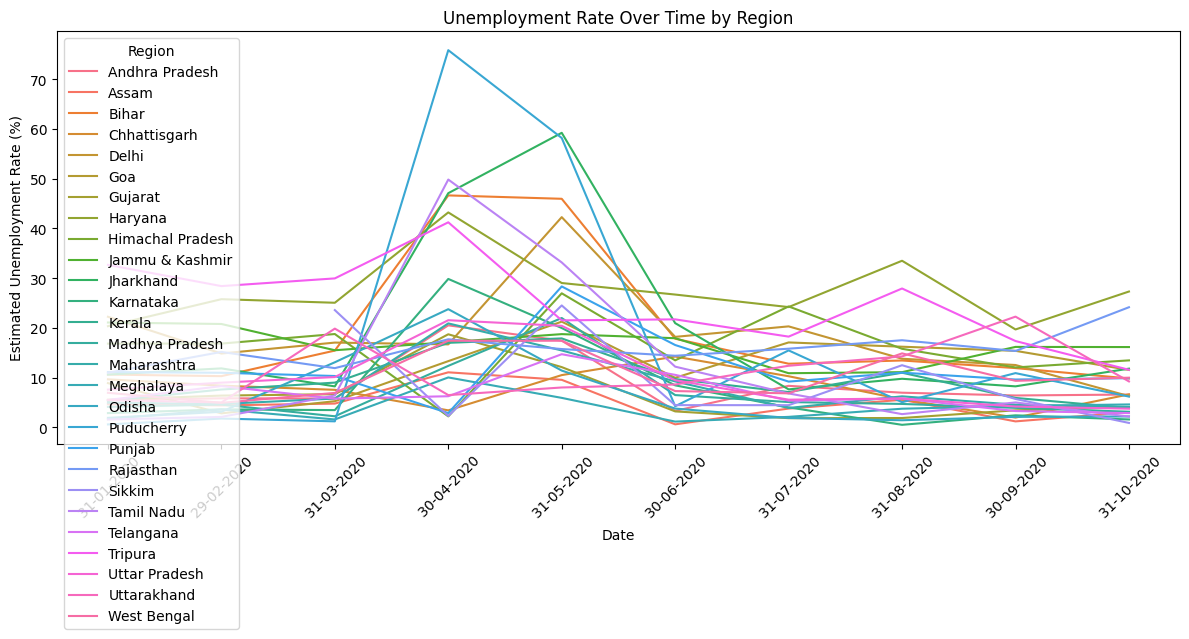

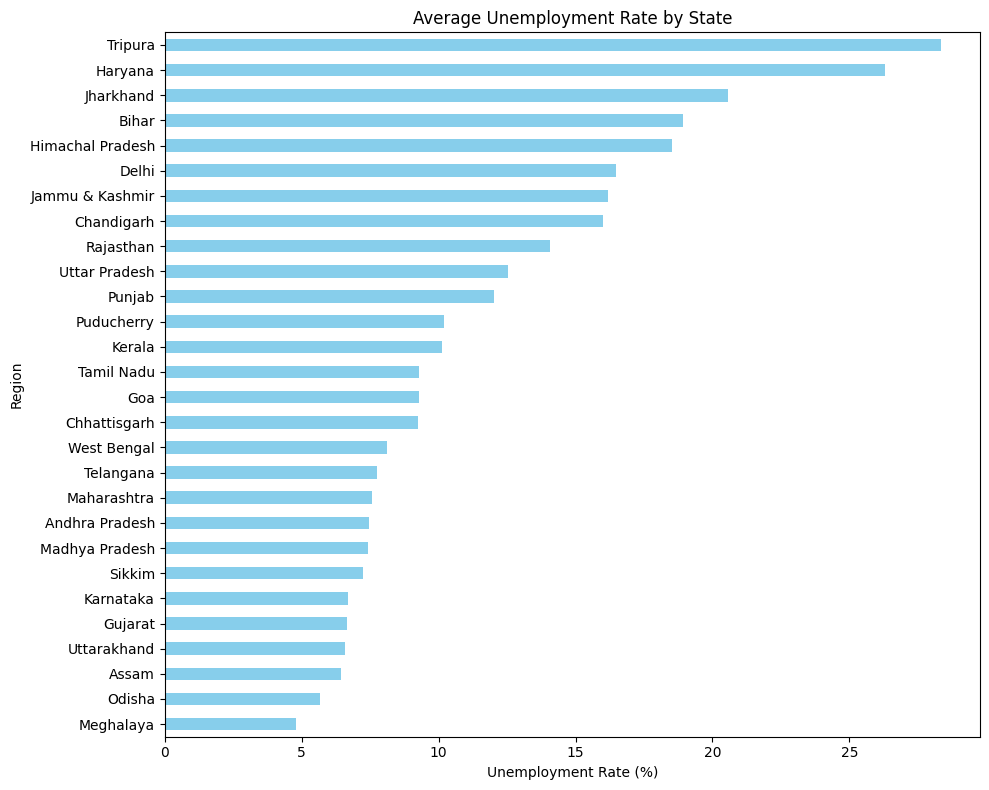

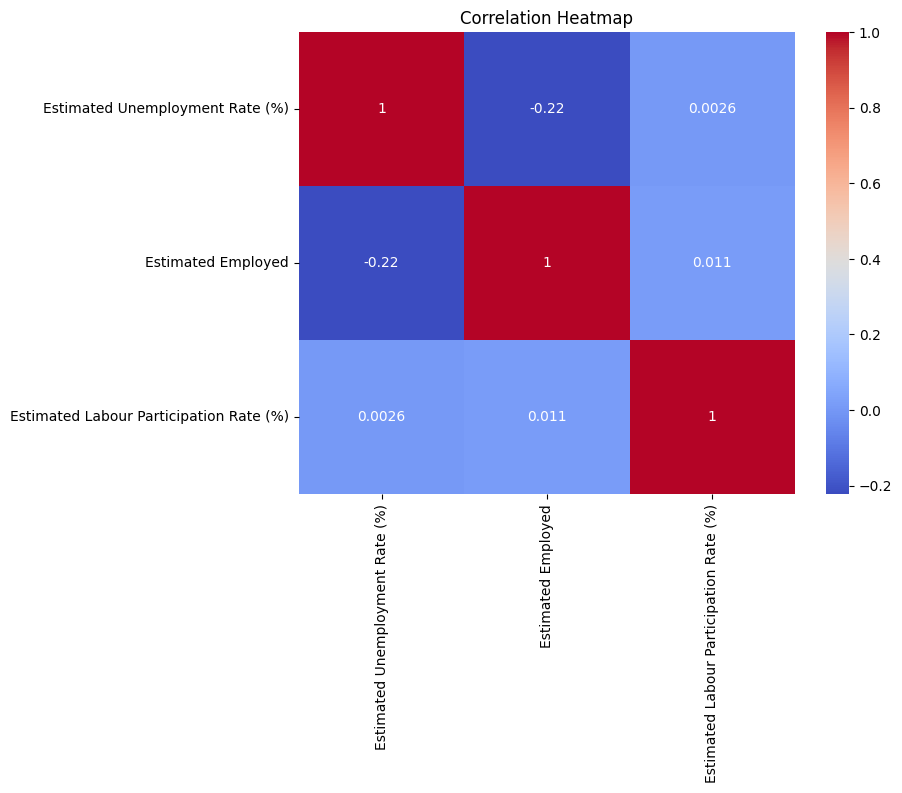

Highest Unemployment State: Tripura - 28.35 %
Lowest Unemployment State: Meghalaya - 4.8 %


In [5]:
from google.colab import files
import zipfile
import os

print("Please upload 'archive (1).zip'")
uploaded = files.upload()

zip_path = list(uploaded.keys())[0]
extract_path = "/content/unemployment_dataset"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("Extracted files:", os.listdir(extract_path))

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


df1 = pd.read_csv(os.path.join(extract_path, "Unemployment in India.csv"))
df2 = pd.read_csv(os.path.join(extract_path, "Unemployment_Rate_upto_11_2020.csv"))

df1.columns = df1.columns.str.strip()
df2.columns = df2.columns.str.strip()

print(df1.head())
print(df2.head())

plt.figure(figsize=(12, 6))
sns.lineplot(data=df2, x="Date", y="Estimated Unemployment Rate (%)", hue="Region")
plt.title("Unemployment Rate Over Time by Region")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

state_avg = df1.groupby("Region")["Estimated Unemployment Rate (%)"].mean().sort_values()
plt.figure(figsize=(10, 8))
state_avg.plot(kind="barh", color="skyblue")
plt.title("Average Unemployment Rate by State")
plt.xlabel("Unemployment Rate (%)")
plt.tight_layout()
plt.show()


plt.figure(figsize=(8, 6))
sns.heatmap(df1.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


print("Highest Unemployment State:", state_avg.idxmax(), "-", round(state_avg.max(), 2), "%")
print("Lowest Unemployment State:", state_avg.idxmin(), "-", round(state_avg.min(), 2), "%")